In [287]:
%matpotlib inline
import pandas
from collections import Counter
from matplotlib import pyplot as plt


df = pandas.read_csv('/home/k/Desktop/titanic3.csv')
# df

In [288]:
ages = list(df['age'])
sex = list(df['sex'])


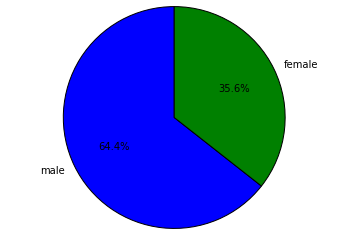

In [289]:
ac = Counter(ages)
sc = Counter(sex)

common = sc.most_common()
sexes, scores = list(zip(*common))

fig1, ax1 = plt.subplots()
ax1.pie(scores, labels=sexes, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
# df

In [290]:
import re


def sexer(sex):
    if 'f' in sex:
        return 1
    elif 'm' in sex:
        return 0
    
    
def deck_extractor(cabin):
    
    decks = {l.upper(): n for n, l in enumerate('abcdefgt')}
    deck = re.sub('[^A-Z]', '', cabin)[0]
    
    return decks[deck]

In [291]:

df['sex'] = df['sex'].apply(sexer)


df = df.drop(df.columns[[2, 7, 10, 11, 12, 13]], axis=1)
df = df.dropna()

df['deck'] = df['cabin'].apply(deck_extractor)

target = list(df['survived'])
df = df.drop('survived', 1)
df = df.drop('cabin', 1)


0       1
1       2
2       2
3       2
4       2
5       4
6       3
7       0
8       2
10      2
11      2
12      1
14      0
16      1
17      1
18      3
19      2
20      3
21      3
22      2
24      2
26      1
27      1
28      2
29      2
30      7
31      0
32      2
33      2
34      3
       ..
342     5
343     3
349     5
380     5
465     3
484     5
485     3
490     4
514     5
515     5
516     5
517     5
520     3
521     5
568     5
573     4
584     4
605     5
873     5
941     5
1024    5
1025    4
1026    4
1131    4
1187    6
1188    6
1189    6
1217    5
1230    6
1231    6
Name: deck, dtype: int64

In [296]:
t_deck = Counter(sorted(df['deck']))
list(sorted(t_deck.most_common()))

[(0, 19), (1, 63), (2, 86), (3, 42), (4, 38), (5, 18), (6, 5), (7, 1)]

In [298]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier



# fit an Extra Trees model to the data
model = ExtraTreesClassifier()

model.fit(df, target)
# display the relative importance of each attribute
print(model.feature_importances_)



[ 0.01849842  0.32036217  0.25017941  0.03499104  0.03410087  0.2414819
  0.1003862 ]


In [299]:
df.describe()

,pclass,sex,age,sibsp,parch,fare,deck
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,1.172794,0.492647,36.922488,0.503676,0.474265,84.905853,2.352941
std,0.489290,0.500867,15.587495,0.642861,0.786932,80.401431,1.445336
min,1.000000,0.000000,0.916700,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.000000,0.000000,0.000000,30.000000,1.000000
50%,1.000000,0.000000,36.000000,0.000000,0.000000,61.175000,2.000000
75%,1.000000,1.000000,48.000000,1.000000,1.000000,96.731250,3.000000
max,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200,7.000000


In [153]:
nan

nan